In [1]:
from lib.notebook_imports import *

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

%load_ext autoreload
%autoreload 2

shap.initjs()

start_time = datetime.now()


# READ DATA

In [ ]:
data_900 = read_data('/dysk1/approx/invicta/1.1.1./', merge_with_meds=True, merge_with_patient_genes=True)
data_900_df = data_900.input_df
data_2015_df = read_data_2015('/dysk1/approx/invicta/1.1.1./')

LGB_PARAMS_BASE, N_FOLDS, ALL_MODEL_SUFFIXES, BASE_COLS_1, BASE_COLS_2 = get_consts()

DATA_SERIES_900, DATA_SERIES_2015, DATA_SERIES = prepare_data_series(data_900_df, data_2015_df, N_FOLDS)


# CONST MODELS

In [3]:
const_model_rmse = {}
for data_serie_name, data_serie in DATA_SERIES.items():
    input_target_mean = data_serie.input_df[data_serie.target_col].mean()
    print(
        f'MEAN[{data_serie_name}]: '.ljust(30, ' ') +
        f'{"%.2f"%input_target_mean}')
    const_model_rmse[data_serie_name] = RMSE(
        [input_target_mean] * len(data_serie.input_df),
        data_serie.input_df[data_serie.target_col]
    )
print('-')

for data_serie_name, data_serie in DATA_SERIES.items():
    print(
        f'RMSE[{data_serie_name}]: '.ljust(30, ' ') +
        f'{"%.2f"%const_model_rmse[data_serie_name]}')

MEAN[900_cumulus_denuded]:    7.64
MEAN[900_day_0_mii]:          5.92
MEAN[2015_cumulus_denuded]:   9.08
MEAN[2015_day_0_mii]:         6.96
-
RMSE[900_cumulus_denuded]:    6.19
RMSE[900_day_0_mii]:          4.75
RMSE[2015_cumulus_denuded]:   5.85
RMSE[2015_day_0_mii]:         4.64


# BASE EXPERIMENTS

In [4]:
BASE_RESULTS = perform_base_experiments(
    LGB_PARAMS_BASE,
    DATA_SERIES,
    ALL_MODEL_SUFFIXES,
    #['l2', 'h20'],
    ['h20', 'h25'],
    [[], BASE_COLS_1, BASE_COLS_2]
)

divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars


-
RMSE[fold_avg][h20][900_cumulus_denuded]:      count:530    avg:7.64   0.29    
MAE[fold_avg][h20][900_cumulus_denuded]:       count:530    avg:7.64   0.17    
MAPE[fold_avg][h20][900_cumulus_denuded]:      count:530    avg:7.64   0.99    
LIKELIHOOD[fold_avg][h20][900_cumulus_denuded]: count:530    avg:7.64   0.73    
-
RMSE[fold_avg][h25][900_cumulus_denuded]:      count:530    avg:7.64   0.20    
MAE[fold_avg][h25][900_cumulus_denuded]:       count:530    avg:7.64   0.08    
MAPE[fold_avg][h25][900_cumulus_denuded]:      count:530    avg:7.64   1.00    
LIKELIHOOD[fold_avg][h25][900_cumulus_denuded]: count:530    avg:7.64   0.84    
-----------------------------
-
RMSE[fold_avg][h20][900_day_0_mii]:            count:516    avg:5.92   0.29    
MAE[fold_avg][h20][900_day_0_mii]:             count:516    avg:5.92   0.17    
MAPE[fold_avg][h20][900_day_0_mii]:            count:516    avg:5.92   0.99    
LIKELIHOOD[fold_avg][h20][900_day_0_mii]:      count:516    avg:5.92   0.73    
-


invalid value encountered in log
invalid value encountered in log
invalid value encountered in log
invalid value encountered in log
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
invalid value encountered in log
invalid value encountered in log
invalid value encountered in log
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
invalid value encountered in log
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
invalid value en

-
RMSE[fold_avg][h20][900_cumulus_denuded]:      count:530    avg:7.64   0.24    (-0.05)    
MAE[fold_avg][h20][900_cumulus_denuded]:       count:530    avg:7.64   0.13    (-0.04)    
MAPE[fold_avg][h20][900_cumulus_denuded]:      count:530    avg:7.64   0.78    (-0.22)    
LIKELIHOOD[fold_avg][h20][900_cumulus_denuded]: count:530    avg:7.64   0.82    (0.09)    
-
RMSE[fold_avg][h25][900_cumulus_denuded]:      count:530    avg:7.64   0.19    (-0.01)    
MAE[fold_avg][h25][900_cumulus_denuded]:       count:530    avg:7.64   0.07    (-0.01)    
MAPE[fold_avg][h25][900_cumulus_denuded]:      count:530    avg:7.64   0.91    (-0.09)    
LIKELIHOOD[fold_avg][h25][900_cumulus_denuded]: count:530    avg:7.64   0.87    (0.03)    
-----------------------------
-
RMSE[fold_avg][h20][900_day_0_mii]:            count:516    avg:5.92   0.24    (-0.05)    
MAE[fold_avg][h20][900_day_0_mii]:             count:516    avg:5.92   0.12    (-0.05)    
MAPE[fold_avg][h20][900_day_0_mii]:            count:5

invalid value encountered in log
invalid value encountered in log
invalid value encountered in log
invalid value encountered in log
invalid value encountered in log
invalid value encountered in log
invalid value encountered in log
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
invalid value encountered in log
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
invalid value encountered in log
invalid value encountered in log
invalid value encountered in log
invalid value encountered in log
invalid value encountered in log
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
invalid value encountered in log
divide by zero encountered in double_scalars
divide by zero encountered in double_scalar

-
RMSE[fold_avg][h20][900_cumulus_denuded]:      count:530    avg:7.64   0.25    (-0.04)    (0.00)    
MAE[fold_avg][h20][900_cumulus_denuded]:       count:530    avg:7.64   0.13    (-0.04)    (0.00)    
MAPE[fold_avg][h20][900_cumulus_denuded]:      count:530    avg:7.64   0.80    (-0.19)    (0.03)    
LIKELIHOOD[fold_avg][h20][900_cumulus_denuded]: count:530    avg:7.64   0.82    (0.08)    (-0.00)    
-
RMSE[fold_avg][h25][900_cumulus_denuded]:      count:530    avg:7.64   0.17    (-0.03)    (-0.02)    
MAE[fold_avg][h25][900_cumulus_denuded]:       count:530    avg:7.64   0.06    (-0.02)    (-0.01)    
MAPE[fold_avg][h25][900_cumulus_denuded]:      count:530    avg:7.64   0.74    (-0.26)    (-0.17)    
LIKELIHOOD[fold_avg][h25][900_cumulus_denuded]: count:530    avg:7.64   0.89    (0.05)    (0.01)    
-----------------------------
-
RMSE[fold_avg][h20][900_day_0_mii]:            count:516    avg:5.92   0.25    (-0.04)    (0.01)    
MAE[fold_avg][h20][900_day_0_mii]:             coun

In [5]:
len(BASE_RESULTS)

3

# PLOT LEARNING PROGRESS

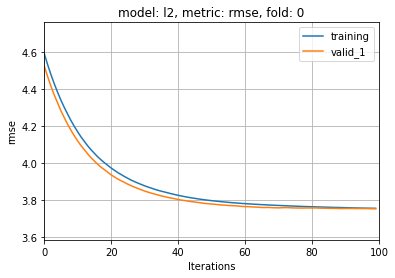

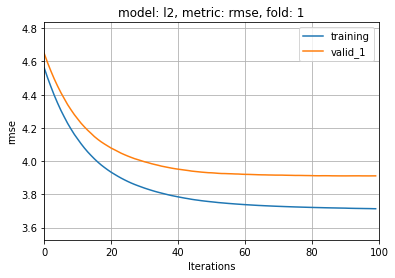

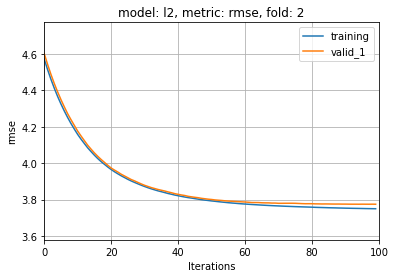

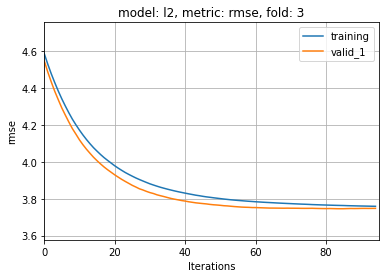

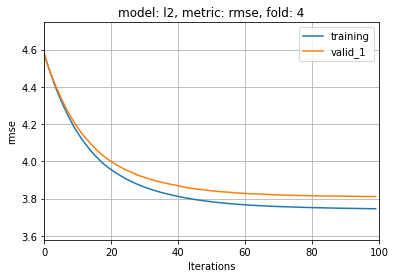

In [6]:
BASE_RESULTS[2].train_infos['2015_day_0_mii'].plot_learning_progress(
    plot_metrics=[
        'rmse',
        #'l1', # alias: 'mae',
        #'l2', # alias: 'mse',
        #'mape',
    ],
    plot_sufixes=[
        #'upp',
        'l2',
        #'log_l2',
        #'low',
        #'l1',
        #'mape',
        #'h20',
    ]
)

# RMSE FOR POSEIDON GROUPS

In [7]:
poseidon_group_filter_tuples = [
    ('poseidon_group', poseidon_group)
    for poseidon_group in sorted(data_2015_df['poseidon_group'].unique())
]

BASE_RESULTS[1].print_rmse_for_filter(poseidon_group_filter_tuples)

900_cumulus_denuded      : 0a_no_amh                          : count: 0        : RMSE: nan
900_cumulus_denuded      : 0b_first_time                      : count: 156      : RMSE: 6.05
900_cumulus_denuded      : 0c_prev10ormore                    : count: 43       : RMSE: 6.83
900_cumulus_denuded      : 1a_young35_highAMH1.2_prev0to3     : count: 13       : RMSE: 2.42
900_cumulus_denuded      : 1b_young35_highAMH1.2_prev4to9     : count: 45       : RMSE: 3.86
900_cumulus_denuded      : 2a_old35_highAMH1.2_prev0to3       : count: 27       : RMSE: 4.56
900_cumulus_denuded      : 2b_old35_highAMH1.2_prev4to9       : count: 42       : RMSE: 4.61
900_cumulus_denuded      : 3_young35_lowAMH1.2                : count: 87       : RMSE: 2.80
900_cumulus_denuded      : 4_old35_lowAMH1.2                  : count: 117      : RMSE: 2.88
-
900_day_0_mii            : 0a_no_amh                          : count: 0        : RMSE: nan
900_day_0_mii            : 0b_first_time                      : count:

# PLOT PROT_TYPES

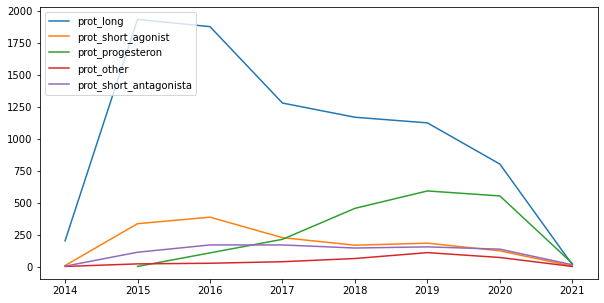

In [8]:
fig, ax = plt.subplots(figsize=(10, 5))

for prot_type in data_2015_df['prot_type'].unique():
    df = data_2015_df[data_2015_df['prot_type'] == prot_type]    
    plt.plot(df['process_start'].dt.year.value_counts().sort_index(), label=prot_type)
    
plt.legend(loc='upper left')

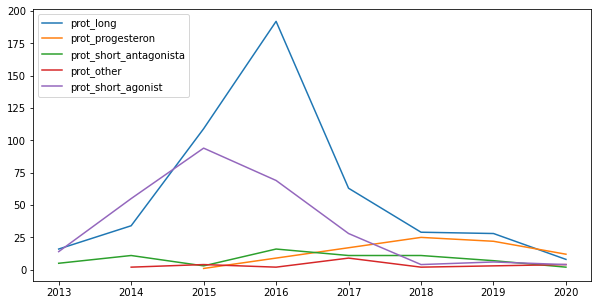

In [9]:
fig, ax = plt.subplots(figsize=(10, 5))

for prot_type in data_900_df['prot_type'].unique():
    df = data_900_df[data_900_df['prot_type'] == prot_type]    
    plt.plot(df['procedure_start'].dt.year.value_counts().sort_index(), label=prot_type)
    
plt.legend(loc='upper left')

# ROC CURVE

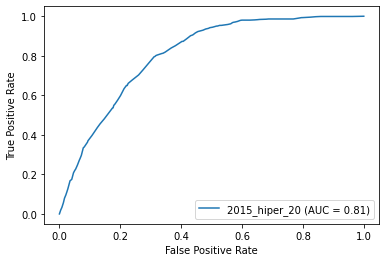

In [10]:
show_roc_curve(BASE_RESULTS[1], '2015_hiper_20', '2015_day_0_mii', 'hiper_20', 'prediction_h20')

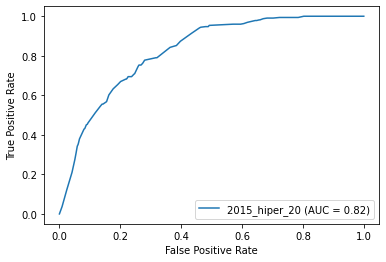

In [11]:
show_roc_curve(BASE_RESULTS[1], '2015_hiper_20', '2015_day_0_mii', 'hiper_25', 'prediction_h25')

In [12]:
show_roc_curve(BASE_RESULTS[1], '900_hiper_20', '900_day_0_mii', 'hiper_20', 'prediction_h20')

In [13]:
show_roc_curve(BASE_RESULTS[1], '900_hiper_25', '900_day_0_mii', 'hiper_25', 'prediction_h25')

# PLOT PREDICTIONS BY AMH

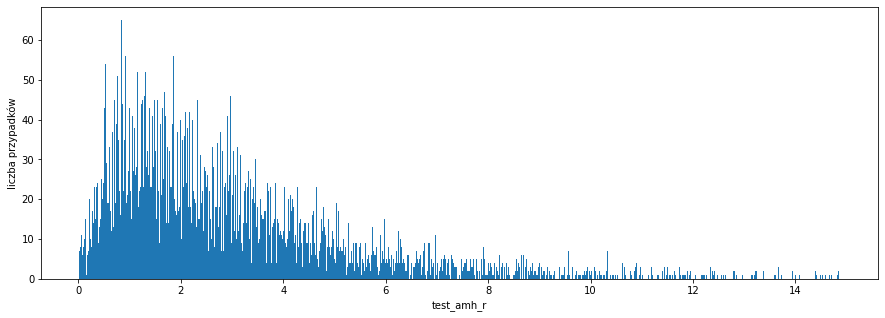

In [14]:
plot_amh_histogram(DATA_SERIES['2015_day_0_mii'].input_df, amh_column='test_amh_r')

In [15]:
plot_scatter_and_trend(
    BASE_RESULTS[0].train_infos['2015_day_0_mii'].input_df,
    'test_amh_r',
    'day_0_mii')

In [16]:
plot_results_sorted_by_amh_and_target(
    BASE_RESULTS[0].train_infos['2015_day_0_mii'], 'BASE1', 'input', amh_column='test_amh_r')

In [17]:
plot_results_sorted_by_amh_and_target(
    BASE_RESULTS[0].train_infos['2015_day_0_mii'], 'BASE1', 'test', amh_column='test_amh_r')

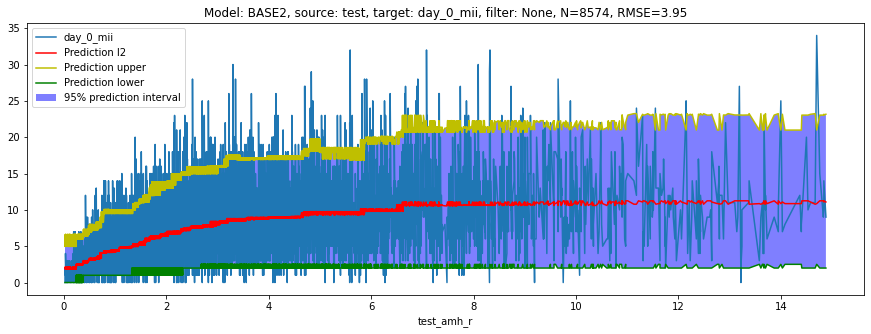

In [18]:
plot_results_sorted_by_amh_and_target(
    BASE_RESULTS[1].train_infos['2015_day_0_mii'], 'BASE2', 'test', amh_column='test_amh_r')

In [19]:
plot_amh_histogram(BASE_RESULTS[0].train_infos['900_day_0_mii'].input_df, amh_column='test_amh_r')

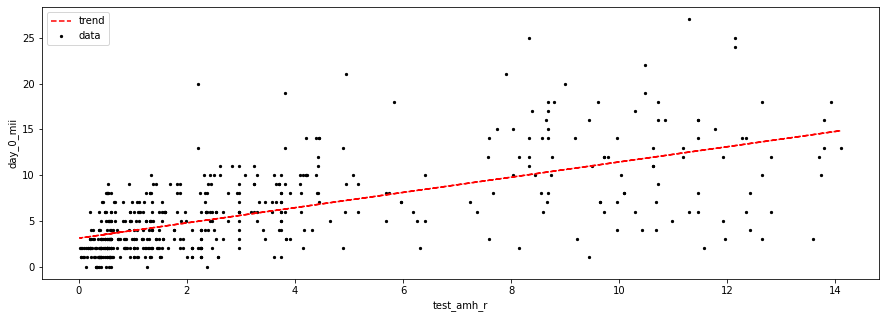

In [20]:
plot_scatter_and_trend(
    BASE_RESULTS[0].train_infos['900_day_0_mii'].input_df,
    'test_amh_r',
    'day_0_mii')

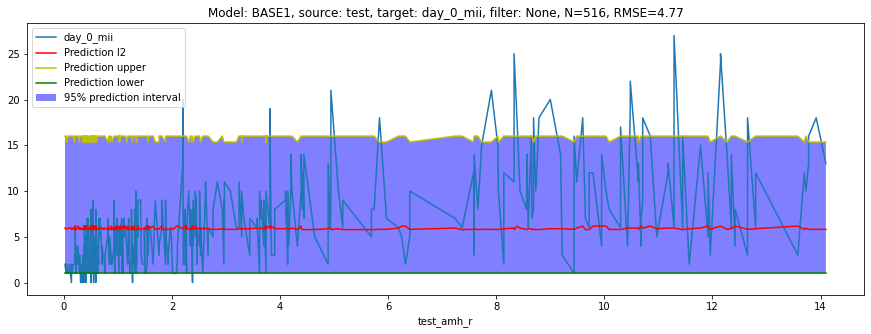

In [21]:
plot_results_sorted_by_amh_and_target(
    BASE_RESULTS[0].train_infos['900_day_0_mii'], 'BASE1', 'test', amh_column='test_amh_r')

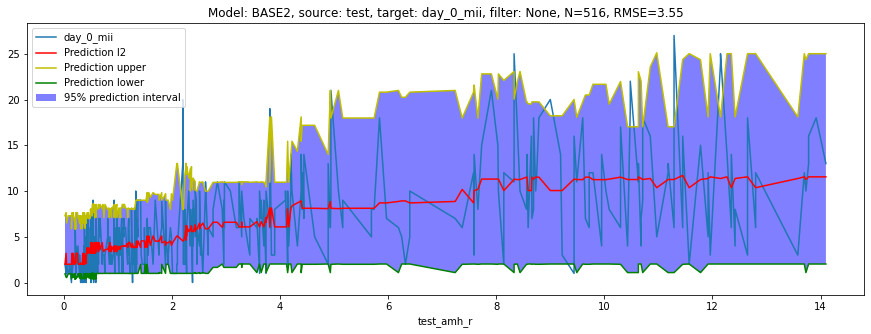

In [22]:
plot_results_sorted_by_amh_and_target(
    BASE_RESULTS[1].train_infos['900_day_0_mii'], 'BASE2', 'test', amh_column='test_amh_r')

# PLOT PREDICTIONS PER MODEL_SUFFIX

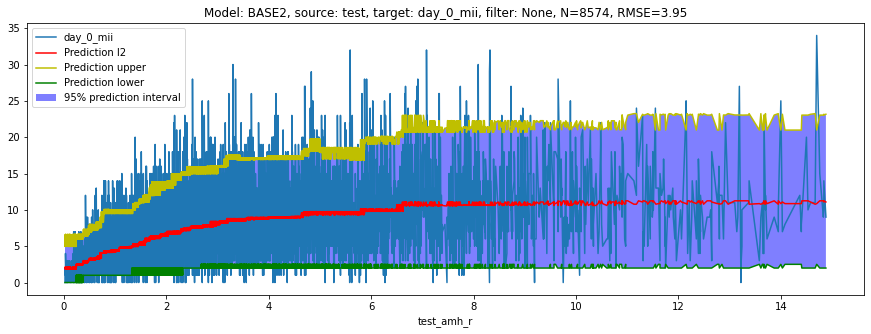

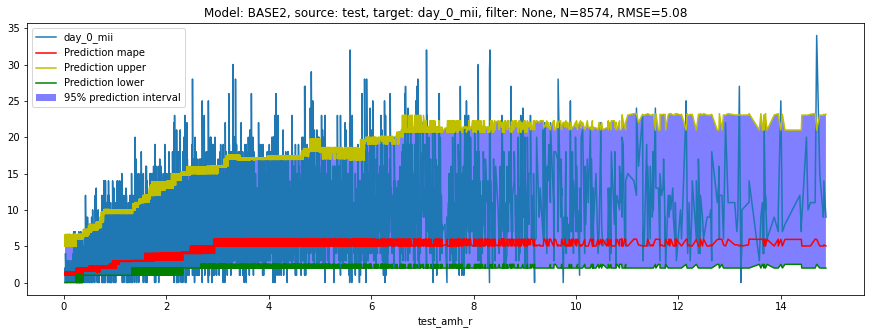

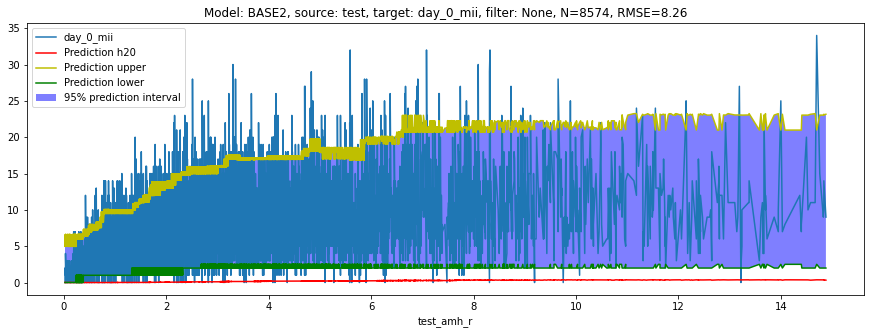

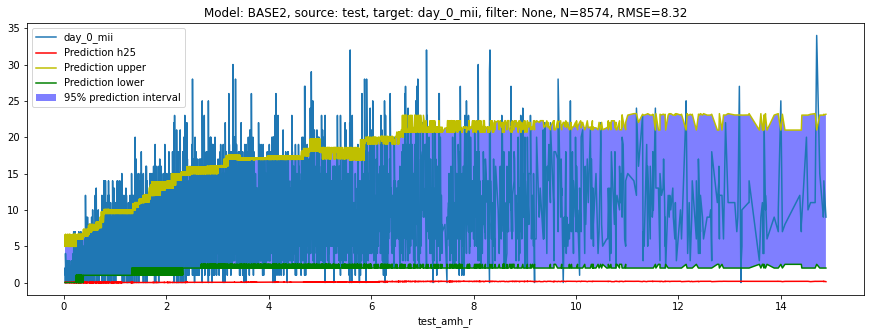

In [23]:
for model_suffix in ['l2', 'l1', 'log_l2', 'mape', 'h20', 'h25']:
    plot_results_sorted_by_amh_and_target(
        BASE_RESULTS[1].train_infos['2015_day_0_mii'],
        'BASE2', 'test', amh_column='test_amh_r',
        prediction_suffix=model_suffix)

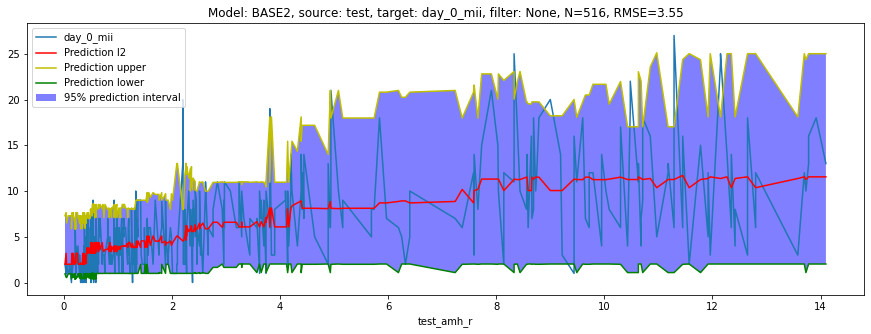

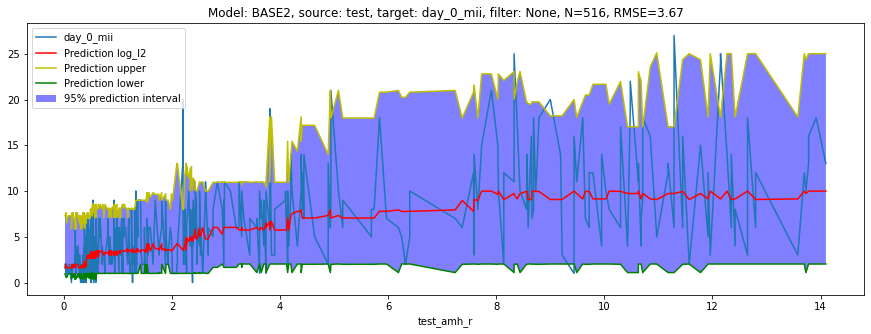

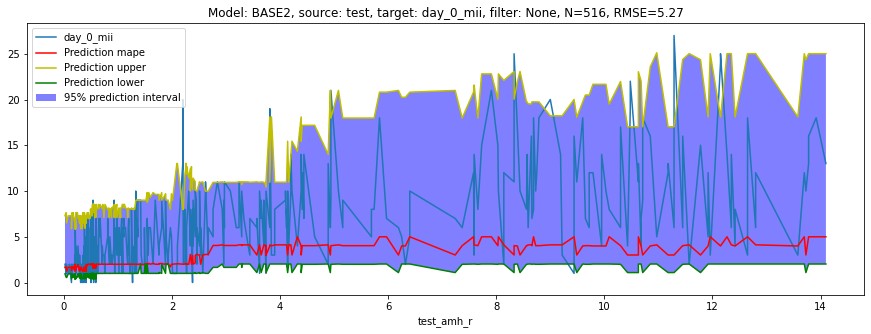

In [24]:
for model_suffix in ['l2', 'l1', 'log_l2', 'mape']:
    plot_results_sorted_by_amh_and_target(
        BASE_RESULTS[1].train_infos['900_day_0_mii'],
        'BASE2', 'test', amh_column='test_amh_r',
        prediction_suffix=model_suffix)

# PLOT PREDICTIONS FOR POSEIDON GROUPS

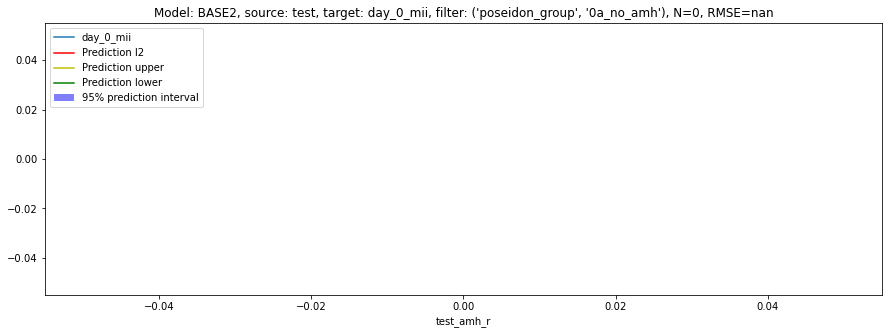

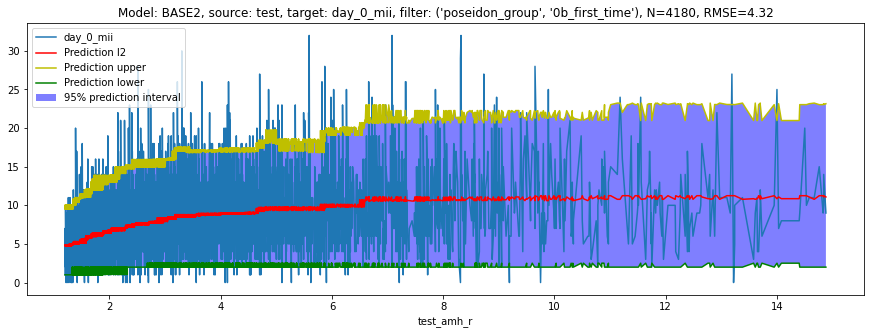

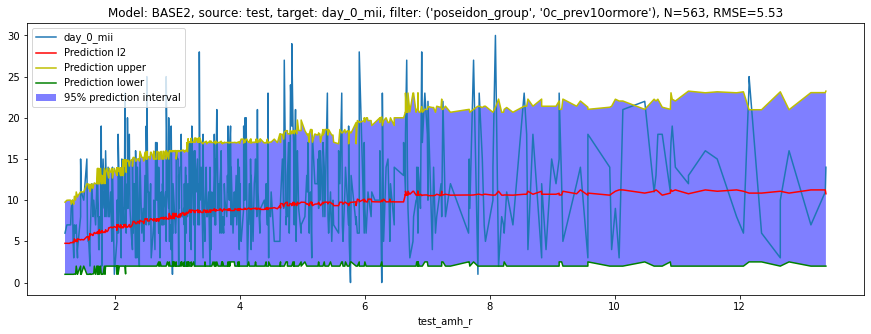

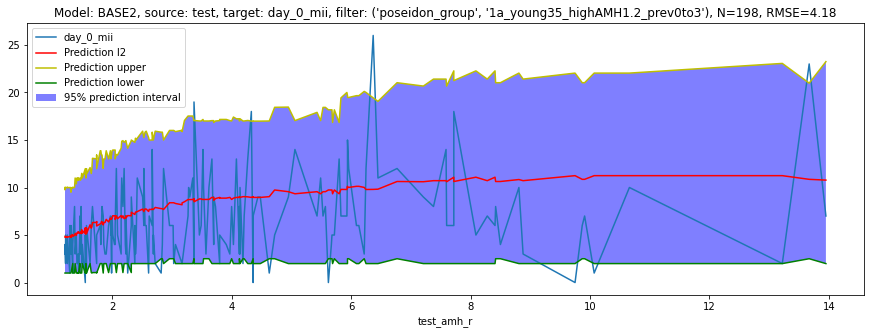

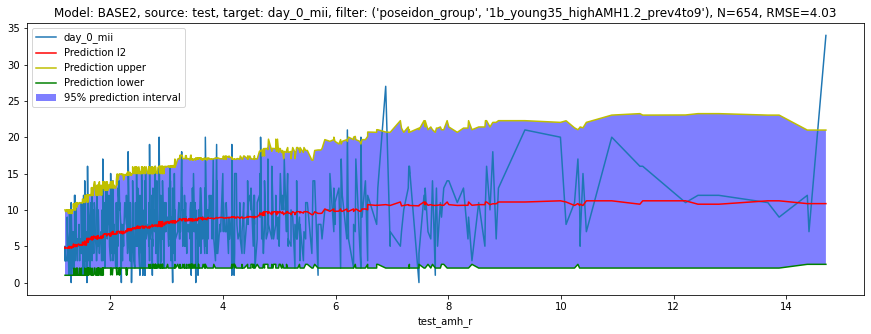

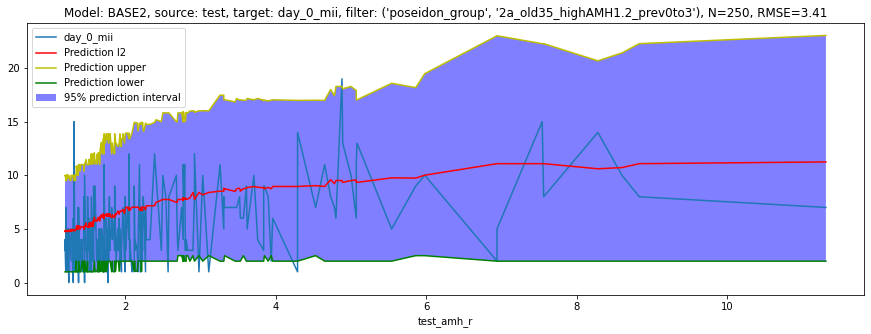

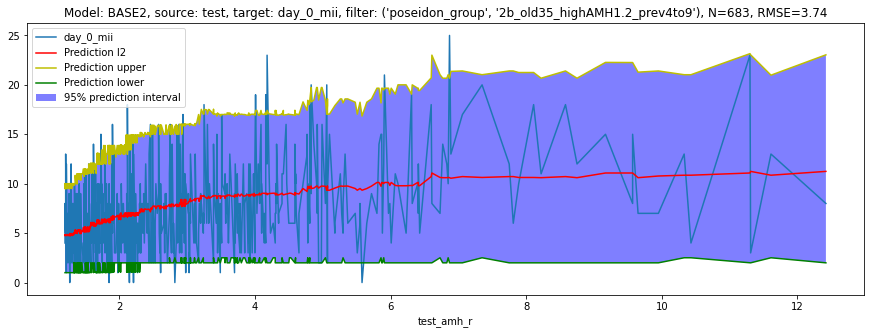

In [25]:
for poseidon_group_filter_tuple in poseidon_group_filter_tuples:
    plot_results_sorted_by_amh_and_target(
        BASE_RESULTS[1].train_infos['2015_day_0_mii'], 'BASE2', 'test',
        amh_column='test_amh_r', filter_tuple=poseidon_group_filter_tuple)

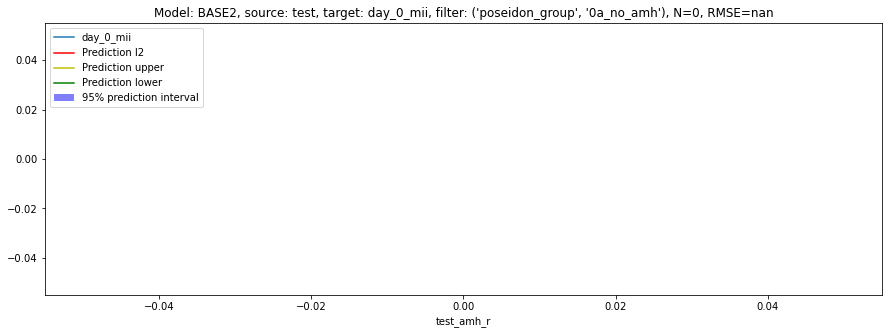

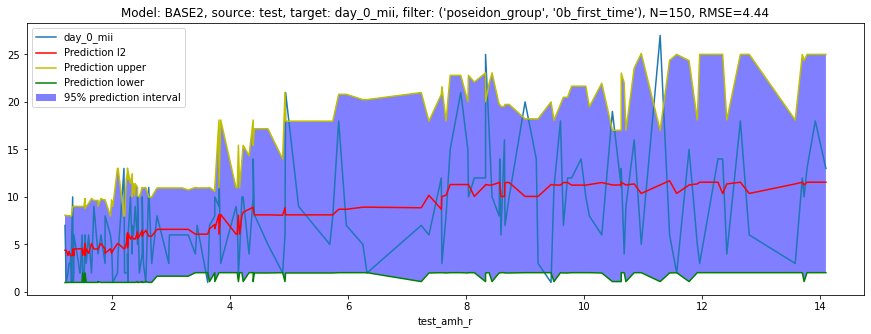

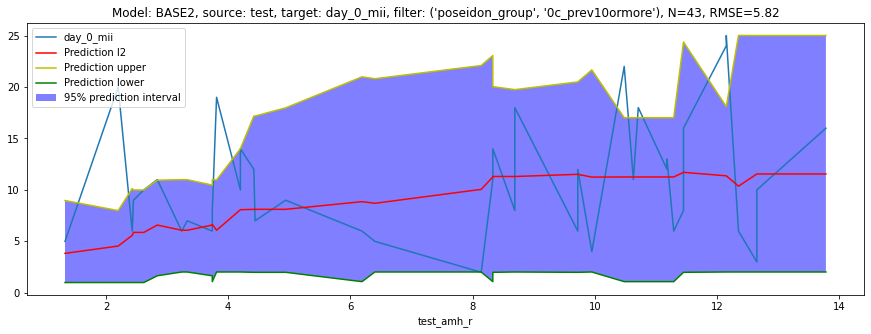

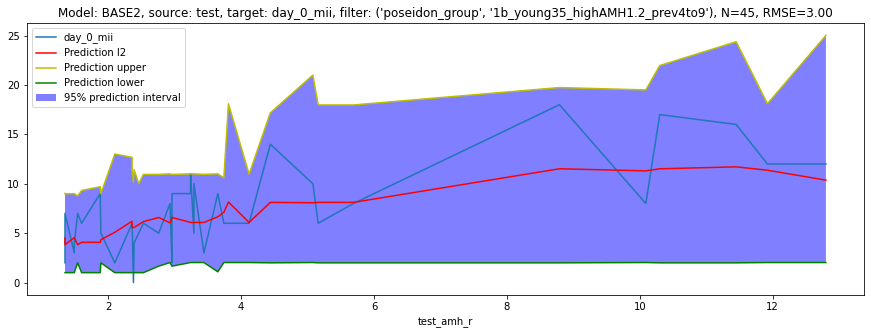

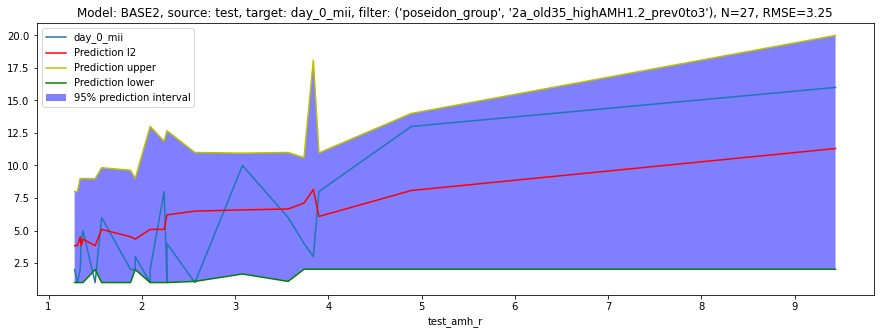

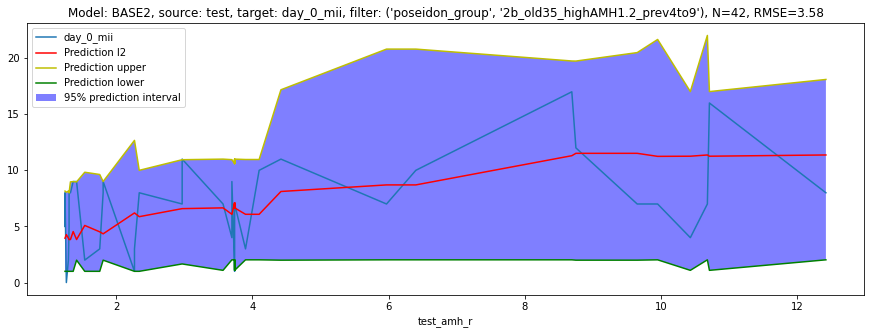

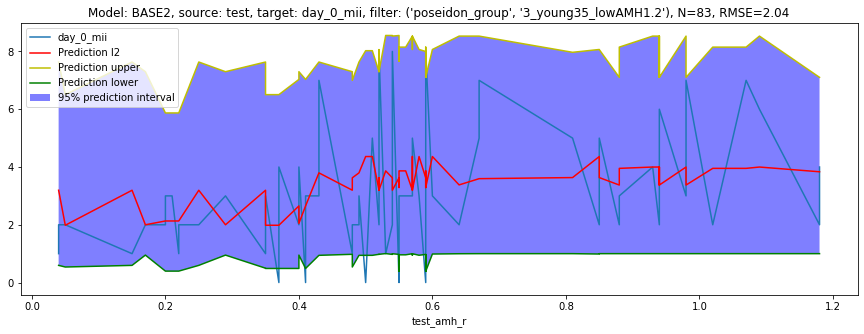

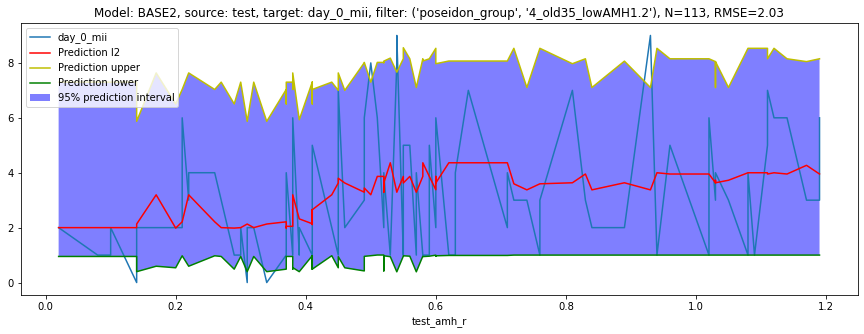

In [26]:
for poseidon_group_filter_tuple in poseidon_group_filter_tuples:
    plot_results_sorted_by_amh_and_target(
        BASE_RESULTS[1].train_infos['900_day_0_mii'], 'BASE2', 'test',
        amh_column='test_amh_r', filter_tuple=poseidon_group_filter_tuple)

# PLOT PREDICTIONS FOR PROT TYPES

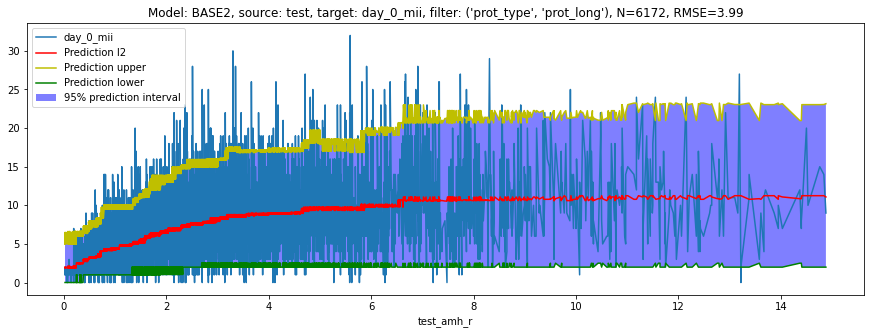

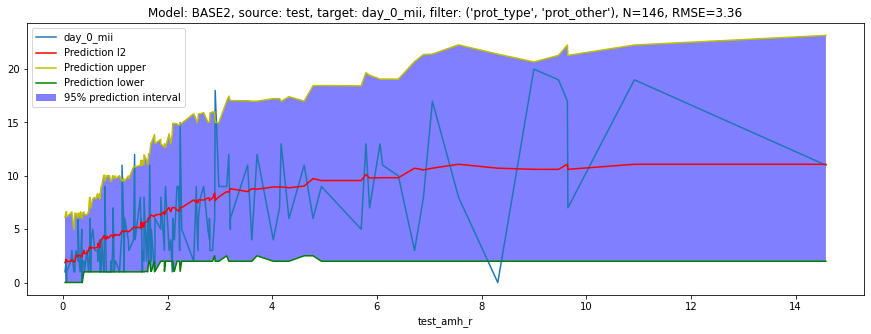

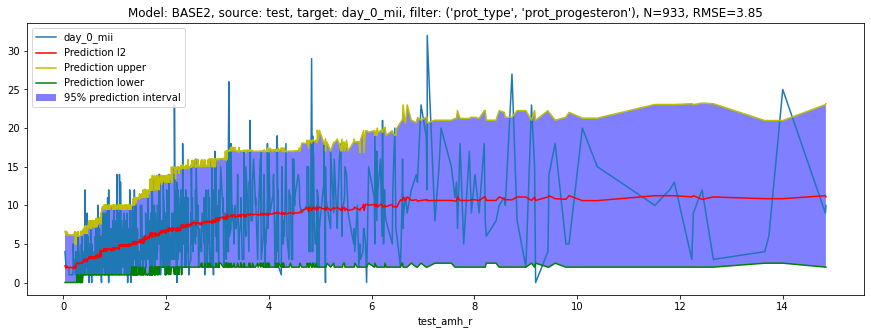

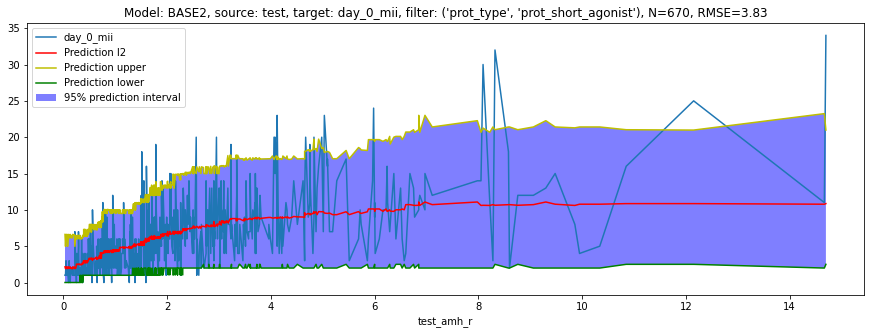

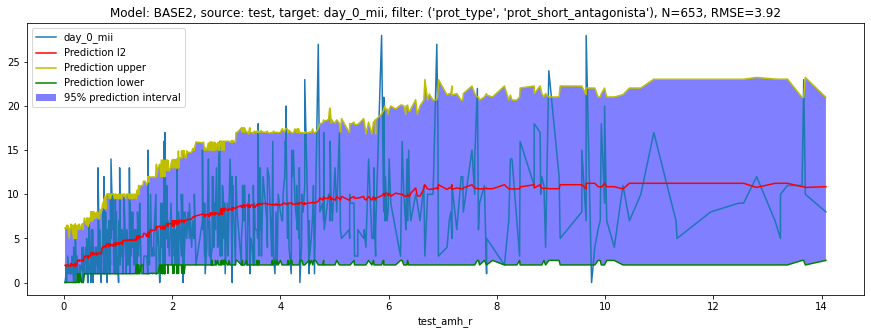

In [27]:
for prot_type in sorted(data_2015_df['prot_type'].unique()):
    plot_results_sorted_by_amh_and_target(
        BASE_RESULTS[1].train_infos['2015_day_0_mii'], 'BASE2', 'test',
        amh_column='test_amh_r', filter_tuple=('prot_type', prot_type))

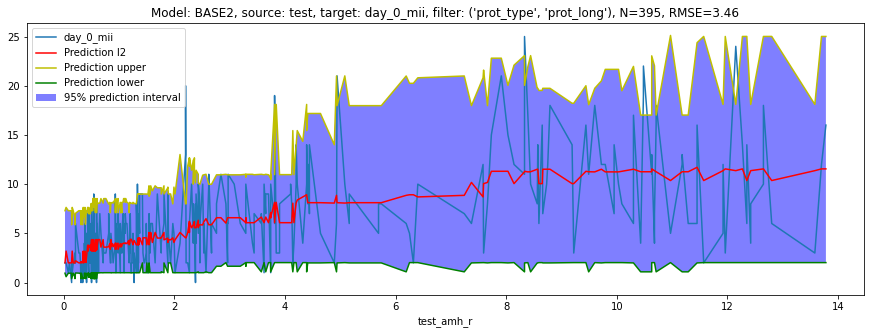

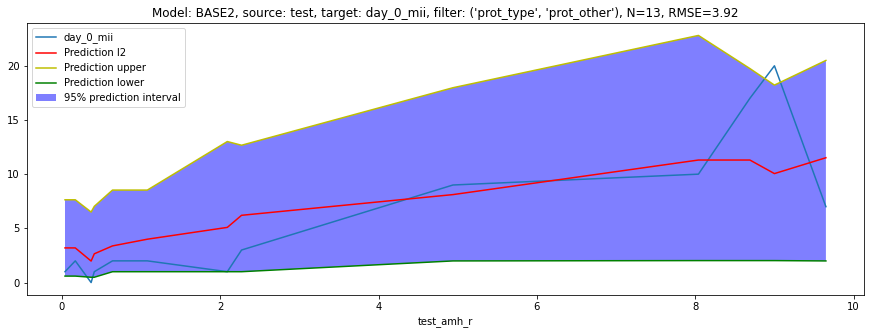

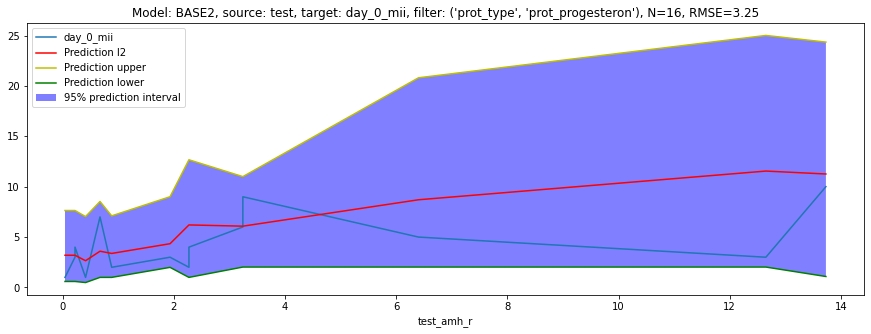

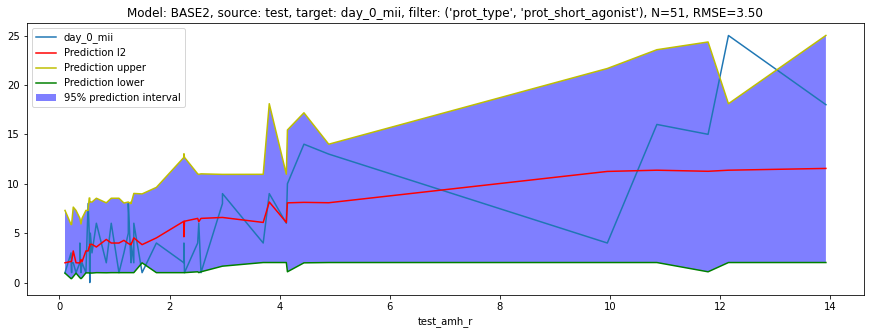

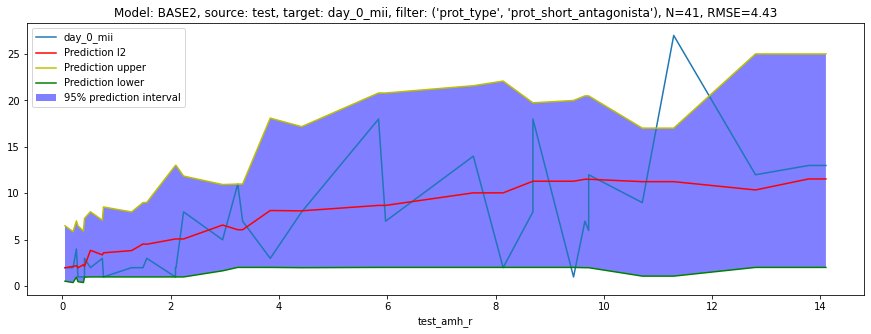

In [28]:
for prot_type in sorted(data_900_df['prot_type'].unique()):
    plot_results_sorted_by_amh_and_target(
        BASE_RESULTS[1].train_infos['900_day_0_mii'], 'BASE2', 'test',
        amh_column='test_amh_r', filter_tuple=('prot_type', prot_type))

# QUICK PLOT AMH -> 150 / 225 / 300

In [29]:
input_df = DATA_SERIES['2015_day_0_mii'].input_df
input_df['round_amh_r'] = input_df['test_amh_r'].round()
input_df = input_df[['round_amh_r', 'test_amh_r', 'ds1_3_dawka_dzienna']]

display(input_df[['round_amh_r', 'test_amh_r', 'ds1_3_dawka_dzienna']].head(5))

agg_df = input_df.groupby(by=['round_amh_r', 'ds1_3_dawka_dzienna']).size().reset_index()
agg_df.head(5)

round_amh_r  test_amh_r  ds1_3_dawka_dzienna
1949          4.0        4.25                150.0
241           4.0        4.48                225.0
242           4.0        3.61                300.0
6960          1.0        1.38                225.0
4749          9.0        8.65                125.0

round_amh_r  ds1_3_dawka_dzienna  0
0          0.0            25.000000  3
1          0.0            30.000000  1
2          0.0            50.000000  8
3          0.0            58.333333  1
4          0.0            75.000000  2

Text(0, 0.5, 'number of protocols')

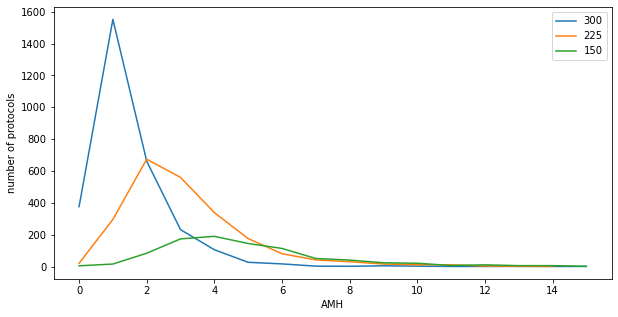

In [30]:
_fig, ax = plt.subplots(figsize=(10, 5))

plt.plot(
    agg_df[agg_df['ds1_3_dawka_dzienna'] == 300]['round_amh_r'],
    agg_df[agg_df['ds1_3_dawka_dzienna'] == 300][0],
    label='300',
)
plt.plot(
    agg_df[agg_df['ds1_3_dawka_dzienna'] == 225]['round_amh_r'],
    agg_df[agg_df['ds1_3_dawka_dzienna'] == 225][0],
    label='225',
)
plt.plot(
    agg_df[agg_df['ds1_3_dawka_dzienna'] == 150]['round_amh_r'],
    agg_df[agg_df['ds1_3_dawka_dzienna'] == 150][0],
    label='150',
)
ax.legend(loc='upper right')
ax.set_xlabel('AMH')
ax.set_ylabel('number of protocols')

In [31]:
print(f'DONE: {format(datetime.now() - start_time)}')

DONE: 0:01:11.670806
